In [2]:
import src.folders as folders
import src.config as config
import src.core as core
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import os

df = core.Helpers.get_REDCap_export()
id_vars=['pID','tp']

In [3]:
df = core.Helpers.get_REDCap_export()
id_vars=['pID','tp']

# prep NQOL
nqol_cols = [col for col in df.columns if (('nqol' in col)  and ('_total' in col) and ('_missing' not in col))]
df_nqol = df[id_vars + nqol_cols].dropna(subset=nqol_cols, how='all')
df_nqol = df_nqol.melt(id_vars=id_vars, value_vars=nqol_cols)
df_nqol = df_nqol.dropna(subset='value')
df_nqol .rename(columns={'variable': 'measure'}, inplace=True)
df_nqol .rename(columns={'value': 'score'}, inplace=True)
df_nqol['measure'] = df_nqol['measure'].str.replace('nqol_', '')
df_nqol['measure'] = df_nqol['measure'].str.replace('_total', '')

# prep PROMIS
promis_cols = [col for col in df.columns if (('promis' in col)  and ('_total' in col) and ('_missing' not in col))]
df_promis = df[id_vars + promis_cols].dropna(subset=promis_cols, how='all')
df_promis = df_promis.melt(id_vars=id_vars, value_vars=promis_cols)
df_promis = df_promis.dropna(subset='value')
df_promis .rename(columns={'variable': 'measure'}, inplace=True)
df_promis .rename(columns={'value': 'score'}, inplace=True)
df_promis['measure'] = df_promis['measure'].str.replace('promis_', '')
df_promis['measure'] = df_promis['measure'].str.replace('_total', '')

# prep TEQ
teq_cols = [col for col in df.columns if (('teq' in col)  and ('_total' in col) and ('_mising' not in col))] # misspelled in csv
df_teq = df[id_vars + teq_cols].dropna(subset=teq_cols, how='all')
df_teq = df_teq.melt(id_vars=id_vars, value_vars=teq_cols)
df_teq = df_teq.dropna(subset='value')
df_teq .rename(columns={'variable': 'measure'}, inplace=True)
df_teq .rename(columns={'value': 'score'}, inplace=True)
df_teq['measure'] = df_teq['measure'].str.replace('teq_', '')
df_teq['measure'] = df_teq['measure'].str.replace('_total', '')

Text(0.5, 1.0, 'Neuro-QoL items')

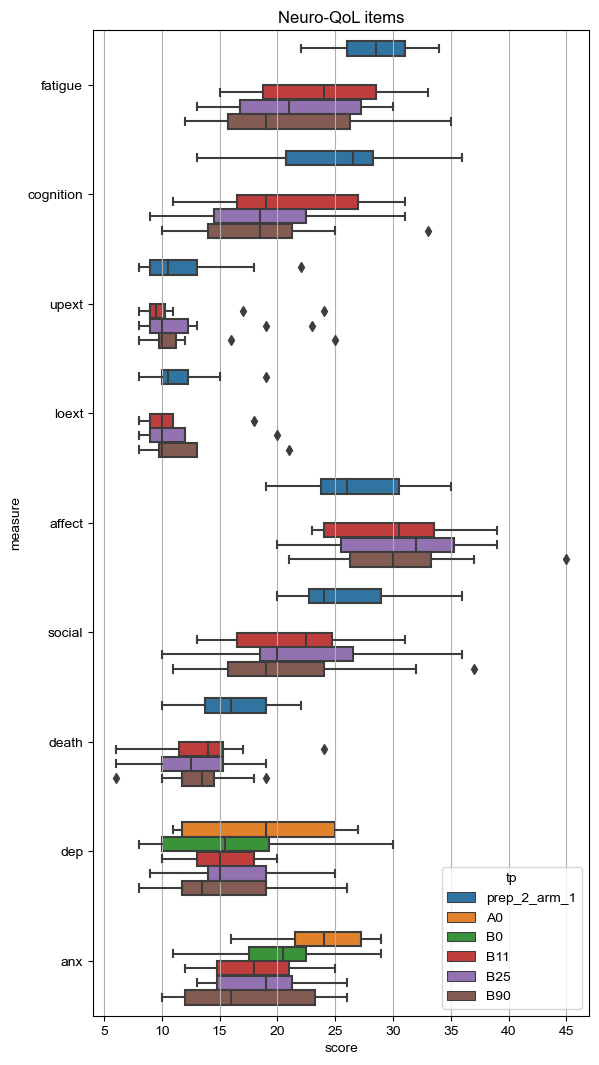

In [4]:
df = df_nqol
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches([6.4, 12.8])

df['tp'] = df['tp'].astype(pd.CategoricalDtype(
    categories=['prep_2_arm_1', 'A0', 'B0', 'B11', 'B25', 'B90'], ordered=True))
sns.boxplot(data=df,y='measure',x='score',hue='tp')
ax.xaxis.grid(True)
ax.set_title('Neuro-QoL items')

Text(0.5, 1.0, 'PANAS items')

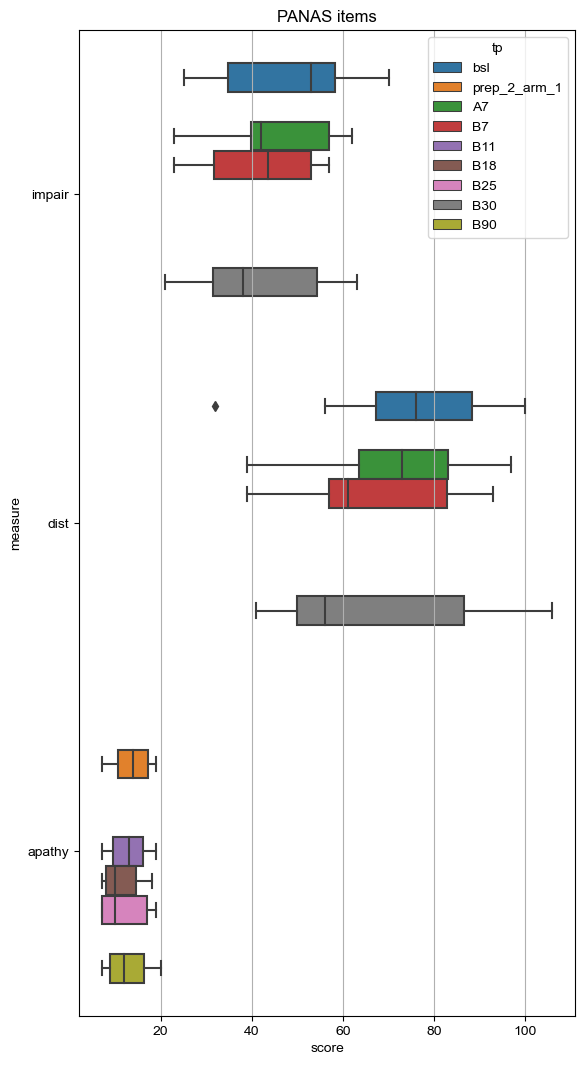

In [5]:
df = df_promis
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches([6.4, 12.8])

df['tp'] = df['tp'].astype(pd.CategoricalDtype(
    categories=['bsl', 'prep_2_arm_1', 'A7', 'B7',  'B11', 'B18', 'B25', 'B30', 'B90'], ordered=True))
sns.boxplot(data=df,y='measure',x='score', hue='tp',)
ax.xaxis.grid(True)
ax.set_title('PANAS items')

Text(0.5, 1.0, 'TEQ items')

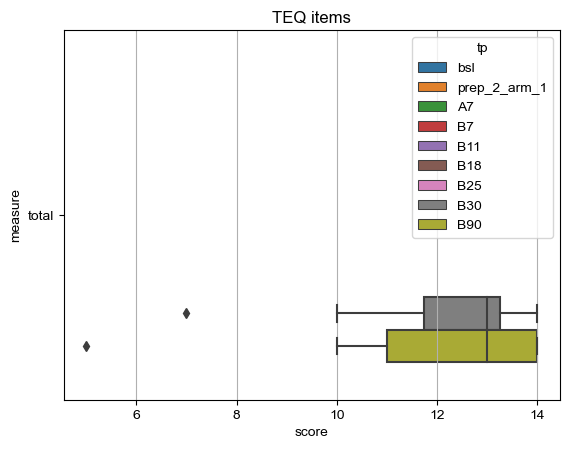

In [6]:
df = df_teq
fig, ax = plt.subplots(nrows=1, ncols=1)

df['tp'] = df['tp'].astype(pd.CategoricalDtype(
    categories=['bsl', 'prep_2_arm_1', 'A7', 'B7',  'B11', 'B18', 'B25', 'B30', 'B90'], ordered=True))
sns.boxplot(data=df, y='measure',x='score', hue='tp',)
ax.xaxis.grid(True)
ax.set_title('TEQ items')